In [48]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.preprocessing import MinMaxScaler

In [38]:
penguins_df = pd.read_csv("penguins.csv")
dummies= pd.get_dummies(penguins_df['sex'])
X = pd.concat([dummies,penguins_df],axis=1)
X.drop('sex',axis=1,inplace=True)

#Standardize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)



The silhouette score is a metric used to evaluate the quality of clustering in unsupervised learning. It measures how well each data point fits within its assigned cluster compared to other clusters. The score provides an indication of how compact and well-separated the clusters are.


Optimal number of clusters: 2
Best silhouette score: 0.66


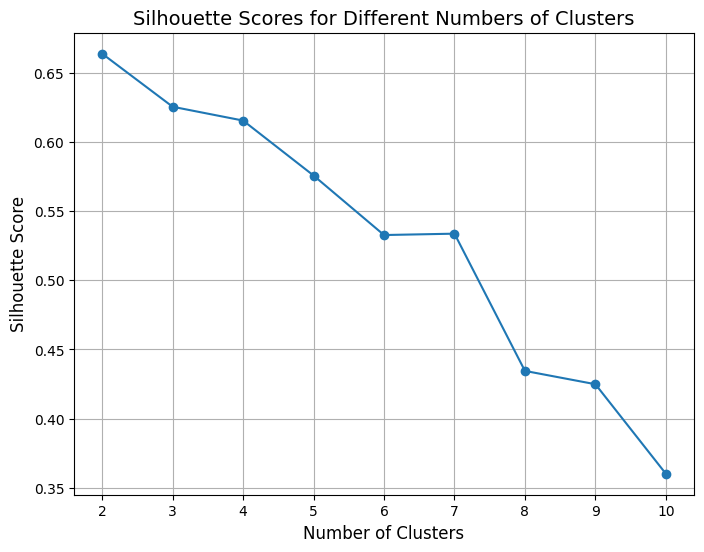

In [43]:
# Step 1: Define the range of clusters to try
range_n_clusters = list(range(2, 11))

# Step 2: Initialize variables to store the best number of clusters and the best silhouette score
best_n_clusters = 0
best_sil_score = -1
sil_scores = []
# Step 3: Iterate over the range of clusters
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    sil_score = silhouette_score(X_scaled, cluster_labels)
    sil_scores.append(sil_score)
    
    # Step 4: Update the best number of clusters and the best silhouette score if the current score is better
    if sil_score > best_sil_score:
        best_sil_score = sil_score
        best_n_clusters = n_clusters

print(f"Optimal number of clusters: {best_n_clusters}")
print(f"Best silhouette score: {best_sil_score:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, sil_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters", fontsize=14)
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.grid(True)
plt.show()

In [44]:
# Step 2: Apply KMeans clustering
n_clusters = best_n_clusters  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)



In [45]:
# Step 3: Calculate the silhouette score
sil_score = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score for {n_clusters} clusters: {sil_score:.2f}")



Silhouette Score for 2 clusters: 0.66


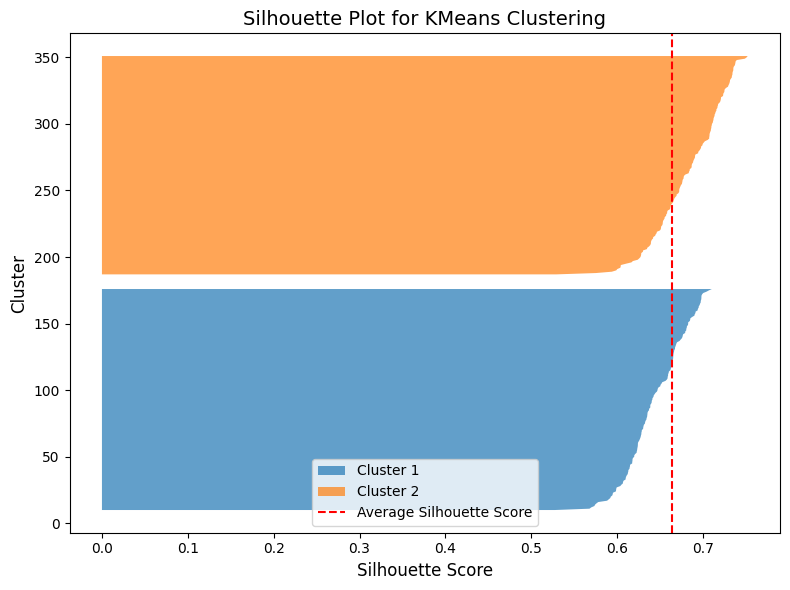

In [46]:
# Step 4: Visualize the silhouette scores for each sample
silhouette_vals = silhouette_samples(X_scaled, cluster_labels)

# Create the silhouette plot
plt.figure(figsize=(8, 6))
y_lower = 10  # Offset for plotting
for i in range(n_clusters):
    # Select silhouette scores for the current cluster
    ith_cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_vals.sort()

    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_vals,
        alpha=0.7,
        label=f"Cluster {i + 1}",
    )
    y_lower = y_upper + 10  # Add some spacing between clusters
    # Add labels and title
plt.axvline(x=sil_score, color="red", linestyle="--", label="Average Silhouette Score")
plt.title("Silhouette Plot for KMeans Clustering", fontsize=14)
plt.xlabel("Silhouette Score", fontsize=12)
plt.ylabel("Cluster", fontsize=12)
plt.legend(loc="best")
plt.tight_layout()
plt.show()